In [228]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [229]:
tenants = pd.read_csv("tenants.csv")
rooms = pd.read_csv("roomsFinal.csv")

In [230]:
tenants.head()

,tenantId,title,tenantName,emailAddress,gender,minBudget,maxBudget,parking,age,married,startDate,location
0,tenant1,Mr,Grayce Wigglesworth,ejorden0@seesaa.net,M,7790,17812,1,30,True,13-Oct-18,Bangalore
1,tenant2,Mr,Roosevelt Lamswood,nseemmonds1@lycos.com,M,5484,11160,0,36,True,25-Sep-18,Bangalore
2,tenant3,Mr,Ophelie Gerant,mhastelow2@biglobe.ne.jp,M,7485,10838,0,58,True,18-Sep-18,Bangalore
3,tenant4,Dr,Ronny Dorian,dgwilliam3@google.com.au,M,6505,29094,1,36,True,21-May-18,Bangalore
4,tenant5,Mr,Port Stollberg,adavison4@cnbc.com,M,5191,14421,0,57,True,12-Jul-18,Bangalore


In [231]:
rooms.head()

,roomId,roomName,address,budget,genderPreference,roomCount,married,parking,availabilityStartDate,location
0,room1,Roberts-Wehner,2 Nobel Hill,21688,F,2,1,1,5/29/2018,bangalore
1,room2,Hyatt-Johnson,22279 Kipling Point,27115,all,3,1,1,9/12/2018,bangalore
2,room3,"Hoppe, Pollich and Watsica",00954 Cody Road,26775,all,3,1,1,7/13/2018,bangalore
3,room4,Luettgen-Jacobi,567 Packers Drive,33653,all,3,1,1,11/26/2018,bangalore
4,room5,"Fahey, Ryan and Schowalter",7 Columbus Center,30822,all,3,1,1,4/13/2019,bangalore


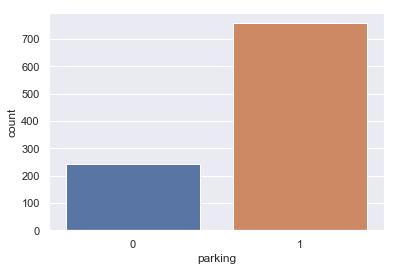

In [232]:
sns.set(style="darkgrid")
parkingPlot = sns.countplot(x="parking",data=tenants)

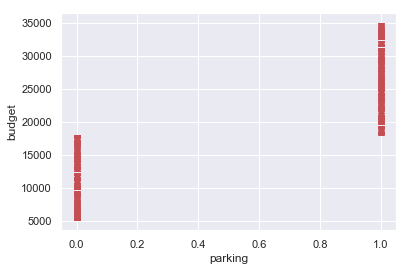

In [233]:
plt.plot(rooms.parking, rooms.budget, 'r_')
plt.ylabel('budget')
plt.xlabel('parking')
# plt.axis([0, 6, 0, 20])
plt.show()

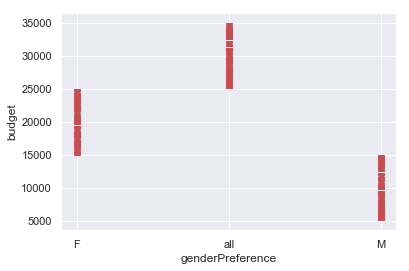

In [234]:
plt.plot(rooms.genderPreference, rooms.budget, 'r_')
plt.ylabel('budget')
plt.xlabel('genderPreference')
# plt.axis([0, 6, 0, 20])
plt.show()

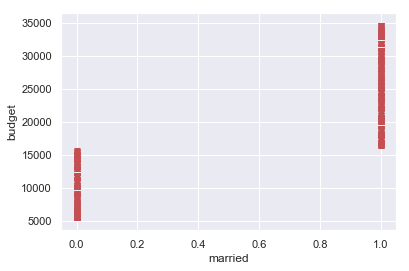

In [235]:
plt.plot(rooms.married, rooms.budget, 'r_')
plt.ylabel('budget')
plt.xlabel('married')
# plt.axis([0, 6, 0, 20])
plt.show()

In [236]:
tenantGender = pd.get_dummies(tenants.gender)
tenantGender.head()

,F,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [237]:
roomGenderPreference = pd.get_dummies(rooms.genderPreference)

for i in range(roomGenderPreference.shape[0]):
    if(roomGenderPreference.iloc[i,2] == 1):
        roomGenderPreference.iloc[i,0] = 1
        roomGenderPreference.iloc[i,1] = 1
roomGenderPreference.drop(columns = "all", inplace = True, axis = 1)
roomGenderPreference.head()

,F,M
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1


In [238]:
tenants['married'] = tenants['married'].astype(int)

In [239]:
#tenants = tenants.drop(columns = ["married", "gender"], axis=1)
tenants = pd.concat([tenants, tenantGender], axis = 1)
tenants = tenants.drop('gender', axis = 1)
tenants.head()

,tenantId,title,tenantName,emailAddress,minBudget,maxBudget,parking,age,married,startDate,location,F,M
0,tenant1,Mr,Grayce Wigglesworth,ejorden0@seesaa.net,7790,17812,1,30,1,13-Oct-18,Bangalore,0,1
1,tenant2,Mr,Roosevelt Lamswood,nseemmonds1@lycos.com,5484,11160,0,36,1,25-Sep-18,Bangalore,0,1
2,tenant3,Mr,Ophelie Gerant,mhastelow2@biglobe.ne.jp,7485,10838,0,58,1,18-Sep-18,Bangalore,0,1
3,tenant4,Dr,Ronny Dorian,dgwilliam3@google.com.au,6505,29094,1,36,1,21-May-18,Bangalore,0,1
4,tenant5,Mr,Port Stollberg,adavison4@cnbc.com,5191,14421,0,57,1,12-Jul-18,Bangalore,0,1


In [240]:
rooms = pd.read_csv("roomsFinal.csv")
rooms = rooms.drop(columns = ["genderPreference"], axis=1)
rooms.head()

,roomId,roomName,address,budget,roomCount,married,parking,availabilityStartDate,location
0,room1,Roberts-Wehner,2 Nobel Hill,21688,2,1,1,5/29/2018,bangalore
1,room2,Hyatt-Johnson,22279 Kipling Point,27115,3,1,1,9/12/2018,bangalore
2,room3,"Hoppe, Pollich and Watsica",00954 Cody Road,26775,3,1,1,7/13/2018,bangalore
3,room4,Luettgen-Jacobi,567 Packers Drive,33653,3,1,1,11/26/2018,bangalore
4,room5,"Fahey, Ryan and Schowalter",7 Columbus Center,30822,3,1,1,4/13/2019,bangalore


In [241]:
rooms = pd.concat([rooms,roomGenderPreference], axis = 1)
rooms.head()

,roomId,roomName,address,budget,roomCount,married,parking,availabilityStartDate,location,F,M
0,room1,Roberts-Wehner,2 Nobel Hill,21688,2,1,1,5/29/2018,bangalore,1,0
1,room2,Hyatt-Johnson,22279 Kipling Point,27115,3,1,1,9/12/2018,bangalore,1,1
2,room3,"Hoppe, Pollich and Watsica",00954 Cody Road,26775,3,1,1,7/13/2018,bangalore,1,1
3,room4,Luettgen-Jacobi,567 Packers Drive,33653,3,1,1,11/26/2018,bangalore,1,1
4,room5,"Fahey, Ryan and Schowalter",7 Columbus Center,30822,3,1,1,4/13/2019,bangalore,1,1


In [242]:
tenantMinBudget = min(tenants.minBudget)
tenantMaxBudget = max(tenants.maxBudget)
roomMinBudget = min(rooms.budget)
roomMaxBudget = max(rooms.budget)
print(roomMaxBudget)
theMinBudget = tenantMinBudget if tenantMinBudget < roomMinBudget else roomMinBudget
theMaxBudget = roomMaxBudget if tenantMaxBudget < roomMaxBudget else tenantMaxBudget
print(theMinBudget,theMaxBudget)
numBy1000 = (theMaxBudget // 1000) - (theMinBudget // 1000) + 1 
print(numBy1000)

34965
5000 34965
30


In [243]:
num = (theMinBudget // 1000)
budgetList = []
for i in range(numBy1000):
    budgetName = str(num + i)+"000-"+str(num + i + 1)+"000"
    budgetList.append(budgetName)
print(budgetList) 

['5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000', '20000-21000', '21000-22000', '22000-23000', '23000-24000', '24000-25000', '25000-26000', '26000-27000', '27000-28000', '28000-29000', '29000-30000', '30000-31000', '31000-32000', '32000-33000', '33000-34000', '34000-35000']


In [244]:
ageList = list(['below21', 'above21', 'above40'])

In [245]:
tenantInfo = set(tenants.columns)
print(tenantInfo)

{'location', 'minBudget', 'emailAddress', 'maxBudget', 'parking', 'title', 'tenantName', 'startDate', 'married', 'M', 'tenantId', 'age', 'F'}


In [246]:
tenantRemove = set(['tenantId', 'title', 'age', 'tenantName', 'emailAddress', 'minBudget', 'maxBudget', 'startDate', 'location'])

In [247]:
tenantInfo = tenantInfo - tenantRemove
print(tenantInfo)

{'parking', 'M', 'married', 'F'}


In [248]:
roomInfo = set(rooms.columns)
print(roomInfo)

{'availabilityStartDate', 'budget', 'location', 'address', 'parking', 'roomCount', 'married', 'roomName', 'M', 'roomId', 'F'}


In [249]:
roomRemove = set(['roomId', 'roomName', 'address', 'roomCount', 'location', 'availabilityStartDate', 'budget'])

In [250]:
roomInfo = roomInfo - roomRemove
print(roomInfo)

{'parking', 'M', 'married', 'F'}


In [251]:
unifiedColumns = list(tenantInfo.union(roomInfo))
print(unifiedColumns)

['parking', 'married', 'M', 'F']


In [252]:
unifiedColumns = unifiedColumns + ageList + budgetList 
print(unifiedColumns)

['parking', 'married', 'M', 'F', 'below21', 'above21', 'above40', '5000-6000', '6000-7000', '7000-8000', '8000-9000', '9000-10000', '10000-11000', '11000-12000', '12000-13000', '13000-14000', '14000-15000', '15000-16000', '16000-17000', '17000-18000', '18000-19000', '19000-20000', '20000-21000', '21000-22000', '22000-23000', '23000-24000', '24000-25000', '25000-26000', '26000-27000', '27000-28000', '28000-29000', '29000-30000', '30000-31000', '31000-32000', '32000-33000', '33000-34000', '34000-35000']


In [253]:
all_tenants = list(tenants['tenantId'])
all_rooms = list(rooms['roomId'])

In [254]:
tenantUnified = np.zeros(shape=(len(all_tenants),len(unifiedColumns)))
tenantUnified = pd.DataFrame(tenantUnified,columns=unifiedColumns)
tenantUnified.index= all_tenants
print(tenantUnified.shape)
tenantUnified.head()

(1000, 37)


,parking,married,M,F,below21,above21,above40,5000-6000,6000-7000,7000-8000,...,25000-26000,26000-27000,27000-28000,28000-29000,29000-30000,30000-31000,31000-32000,32000-33000,33000-34000,34000-35000
tenant1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [255]:
roomUnified = np.zeros(shape=(len(all_rooms),len(unifiedColumns)))
roomUnified = pd.DataFrame(roomUnified,columns=unifiedColumns)
roomUnified.index= all_rooms
print(roomUnified.shape)
roomUnified.head()

(1000, 37)


,parking,married,M,F,below21,above21,above40,5000-6000,6000-7000,7000-8000,...,25000-26000,26000-27000,27000-28000,28000-29000,29000-30000,30000-31000,31000-32000,32000-33000,33000-34000,34000-35000
room1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
for i in tenantUnified.index :
    if(tenants[tenants.tenantId == i]['F'].tolist()[0] == 1):
        tenantUnified.loc[i,'F'] = 4
    if(tenants[tenants.tenantId == i]['M'].tolist()[0] == 1):
        tenantUnified.loc[i,'M'] = 4
    if(tenants[tenants.tenantId == i]['married'].tolist()[0] == 1):
        tenantUnified.loc[i,'married'] = 4
    if(tenants[tenants.tenantId == i]['parking'].tolist()[0] == 1):
        tenantUnified.loc[i,'parking'] = 2
    if(tenants[tenants.tenantId == i]['age'].tolist()[0] <=  21):
        tenantUnified.loc[i,'below21'] = 1
    if (tenants[tenants.tenantId == i]['age'].tolist()[0] > 21 and tenants[tenants.tenantId == i]['age'].tolist()[0] <= 40):
        tenantUnified.loc[i,'above21'] = 1
    if (tenants[tenants.tenantId == i]['age'].tolist()[0] > 40):
        tenantUnified.loc[i,'above40'] = 1
    minBudget = tenants[tenants.tenantId == i]['minBudget'].tolist()[0]
    maxBudget = tenants[tenants.tenantId == i]['maxBudget'].tolist()[0]
    minBudgetNum = minBudget // 1000
    maxBudgetNum = maxBudget // 1000
    for j in range(minBudgetNum, maxBudgetNum + 1):
        budgetRange = str(j)+"000-" + str(j+1)+"000"
        tenantUnified.loc[i,budgetRange] = 5
        
    

In [257]:
tenantUnified

,parking,married,M,F,below21,above21,above40,5000-6000,6000-7000,7000-8000,...,25000-26000,26000-27000,27000-28000,28000-29000,29000-30000,30000-31000,31000-32000,32000-33000,33000-34000,34000-35000
tenant1,2.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant2,0.0,4.0,4.0,0.0,0.0,1.0,0.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant3,0.0,4.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant4,2.0,4.0,4.0,0.0,0.0,1.0,0.0,0.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
tenant5,0.0,4.0,4.0,0.0,0.0,0.0,1.0,5.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant6,2.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,5.0,...,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant7,2.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,5.0,5.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tenant8,2.0,4.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,5.0,...,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
tenant9,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
tenant10,2.0,0.0,0.0,4.0,0.0,1.0,0.0,0.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [258]:
for i in roomUnified.index :
    if(rooms[rooms.roomId == i]['F'].tolist()[0] == 1):
        roomUnified.loc[i,'F'] = 4
    if(rooms[rooms.roomId == i]['M'].tolist()[0] == 1):
        roomUnified.loc[i,'M'] = 4
    if(rooms[rooms.roomId == i]['married'].tolist()[0] == 1):
        roomUnified.loc[i,'married'] = 4
    if(rooms[rooms.roomId == i]['parking'].tolist()[0] == 1):
        roomUnified.loc[i,'parking'] = 2
    budget = rooms[rooms.roomId == i]['budget'].tolist()[0]
    budgetNum = budget // 1000
    budgetRange = str(budgetNum)+"000-" + str(budgetNum+1)+"000"
    roomUnified.loc[i,budgetRange] = 5
        
    

In [259]:
roomUnified

,parking,married,M,F,below21,above21,above40,5000-6000,6000-7000,7000-8000,...,25000-26000,26000-27000,27000-28000,28000-29000,29000-30000,30000-31000,31000-32000,32000-33000,33000-34000,34000-35000
room1,2.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room2,2.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room3,2.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room4,2.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
room5,2.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
room6,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room7,2.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room9,2.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
room10,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
TRD = sklearn.metrics.pairwise.cosine_similarity(tenantUnified.values,roomUnified.values)
TRD = pd.DataFrame(TRD,columns = roomUnified.index)
TRD.index = tenantUnified.index

In [261]:
TRD

,room1,room2,room3,room4,room5,room6,room7,room8,room9,room10,...,room991,room992,room993,room994,room995,room996,room997,room998,room999,room1000
tenant1,0.144973,0.232263,0.232263,0.232263,0.232263,0.362506,0.144973,0.221040,0.144973,0.362506,...,0.141466,0.362506,0.144973,0.221040,0.232263,0.362506,0.362506,0.141466,0.362506,0.232263
tenant2,0.142044,0.252856,0.252856,0.252856,0.252856,0.443977,0.142044,0.000000,0.142044,0.443977,...,0.443977,0.173259,0.142044,0.000000,0.252856,0.443977,0.443977,0.443977,0.173259,0.252856
tenant3,0.177635,0.316212,0.316212,0.316212,0.316212,0.555221,0.177635,0.000000,0.177635,0.555221,...,0.216672,0.216672,0.177635,0.000000,0.316212,0.555221,0.216672,0.216672,0.216672,0.316212
tenant4,0.228285,0.275432,0.275432,0.162550,0.162550,0.253701,0.228285,0.154696,0.228285,0.253701,...,0.099005,0.253701,0.228285,0.154696,0.275432,0.253701,0.253701,0.099005,0.253701,0.162550
tenant5,0.121776,0.216776,0.216776,0.216776,0.216776,0.380626,0.121776,0.000000,0.121776,0.380626,...,0.380626,0.380626,0.121776,0.000000,0.216776,0.380626,0.380626,0.380626,0.380626,0.216776
tenant6,0.315711,0.281002,0.281002,0.165837,0.165837,0.157824,0.315711,0.258831,0.315711,0.157824,...,0.000000,0.157824,0.315711,0.258831,0.165837,0.157824,0.157824,0.000000,0.157824,0.165837
tenant7,0.252423,0.099854,0.099854,0.099854,0.099854,0.171052,0.252423,0.280526,0.252423,0.171052,...,0.000000,0.171052,0.252423,0.280526,0.099854,0.171052,0.171052,0.000000,0.171052,0.099854
tenant8,0.315711,0.281002,0.281002,0.165837,0.165837,0.157824,0.315711,0.258831,0.315711,0.157824,...,0.000000,0.157824,0.315711,0.258831,0.281002,0.157824,0.157824,0.000000,0.157824,0.165837
tenant9,0.231207,0.205789,0.205789,0.091462,0.091462,0.156676,0.231207,0.256949,0.231207,0.156676,...,0.000000,0.156676,0.231207,0.256949,0.205789,0.156676,0.156676,0.000000,0.156676,0.091462
tenant10,0.142926,0.127213,0.127213,0.127213,0.127213,0.217919,0.142926,0.357388,0.142926,0.217919,...,0.000000,0.217919,0.142926,0.357388,0.127213,0.217919,0.217919,0.000000,0.217919,0.127213


In [262]:
tid = "tenant2"
tanentDetails = TRD.loc[tid,:]
recTenantRoom = pd.DataFrame({'distance':tanentDetails.values, 'roomId':tanentDetails.index})
recTenantRoom = recTenantRoom.sort_values(by=['distance'], ascending=False)
recTenantRoom = recTenantRoom[recTenantRoom['distance'] > 0]
recTenantRoom.head()

,distance,roomId
895,0.443977,room896
643,0.443977,room644
485,0.443977,room486
336,0.443977,room337
177,0.443977,room178


In [263]:
rooms.head(1)

,roomId,roomName,address,budget,roomCount,married,parking,availabilityStartDate,location,F,M
0,room1,Roberts-Wehner,2 Nobel Hill,21688,2,1,1,5/29/2018,bangalore,1,0


In [264]:
recTenantRoom['roomName'] = recTenantRoom['roomId'].apply(lambda x: rooms['roomName'][rooms['roomId'] == x].tolist()[0])
recTenantRoom['budget'] = recTenantRoom['roomId'].apply(lambda x: rooms['budget'][rooms['roomId'] == x].tolist()[0])
recTenantRoom['parking'] = recTenantRoom['roomId'].apply(lambda x: rooms['parking'][rooms['roomId'] == x].tolist()[0])
recTenantRoom['availabilityStartDate'] = recTenantRoom['roomId'].apply(lambda x: rooms['availabilityStartDate'][rooms['roomId'] == x].tolist()[0])
recTenantRoom['location'] = recTenantRoom['roomId'].apply(lambda x: rooms['location'][rooms['roomId'] == x].tolist()[0])

In [265]:
recTenantRoom.head()

,distance,roomId,roomName,budget,parking,availabilityStartDate,location
895,0.443977,room896,Rempel-Williamson,9527,0,5/8/2019,bangalore
643,0.443977,room644,Schaden-Beahan,7999,0,11/16/2018,bangalore
485,0.443977,room486,Gutmann-Littel,6474,0,11/6/2018,bangalore
336,0.443977,room337,"Bruen, Larkin and Kutch",5029,0,2/19/2019,bangalore
177,0.443977,room178,Farrell Inc,8964,0,11/21/2018,bangalore


In [266]:
tenants[tenants['tenantId'] == tid]

,tenantId,title,tenantName,emailAddress,minBudget,maxBudget,parking,age,married,startDate,location,F,M
1,tenant2,Mr,Roosevelt Lamswood,nseemmonds1@lycos.com,5484,11160,0,36,1,25-Sep-18,Bangalore,0,1


In [267]:
TTD = sklearn.metrics.pairwise.cosine_similarity(tenantUnified.values,tenantUnified.values)
TTD = pd.DataFrame(TTD,columns = tenantUnified.index)
TTD.index = tenantUnified.index

In [268]:
TTD

,tenant1,tenant2,tenant3,tenant4,tenant5,tenant6,tenant7,tenant8,tenant9,tenant10,...,tenant991,tenant992,tenant993,tenant994,tenant995,tenant996,tenant997,tenant998,tenant999,tenant1000
tenant1,1.000000,0.620223,0.647994,0.699854,0.780760,0.677390,0.692003,0.677390,0.636114,0.884766,...,0.759364,0.839106,0.726715,0.884766,0.801630,0.720705,0.675101,0.633842,0.959099,0.682321
tenant2,0.620223,1.000000,0.793627,0.502747,0.853189,0.468068,0.455660,0.397998,0.420145,0.584377,...,0.524711,0.608554,0.449313,0.487625,0.636838,0.571498,0.535335,0.486923,0.646673,0.835669
tenant3,0.647994,0.793627,1.000000,0.453501,0.685540,0.406590,0.383687,0.406590,0.347959,0.483974,...,0.455793,0.503997,0.476000,0.483974,0.481162,0.434055,0.410095,0.351439,0.675627,0.725908
tenant4,0.699854,0.502747,0.453501,1.000000,0.605299,0.954555,0.874867,0.954555,0.961922,0.674493,...,0.845642,0.644826,0.958316,0.674493,0.750559,0.846347,0.912913,0.920583,0.671230,0.549011
tenant5,0.780760,0.853189,0.685540,0.605299,1.000000,0.579093,0.588568,0.519021,0.536715,0.746512,...,0.649171,0.777398,0.571668,0.663566,0.756393,0.682341,0.641567,0.598735,0.814055,0.819388
tenant6,0.677390,0.468068,0.406590,0.954555,0.579093,1.000000,0.920892,0.959150,0.966774,0.724230,...,0.892049,0.695457,0.950999,0.724230,0.796674,0.891370,0.957516,0.965151,0.646625,0.513436
tenant7,0.692003,0.455660,0.383687,0.874867,0.588568,0.920892,1.000000,0.876618,0.914195,0.782490,...,0.933071,0.751203,0.867967,0.782490,0.827823,0.935835,0.922663,0.915953,0.656862,0.553310
tenant8,0.677390,0.397998,0.406590,0.954555,0.519021,0.959150,0.876618,1.000000,0.966774,0.667826,...,0.846256,0.636719,0.950999,0.724230,0.748332,0.847761,0.916667,0.924599,0.646625,0.440505
tenant9,0.636114,0.420145,0.347959,0.961922,0.536715,0.966774,0.914195,0.966774,1.000000,0.718963,...,0.856467,0.690399,0.917582,0.718963,0.760166,0.857180,0.924599,0.958132,0.604023,0.509702
tenant10,0.884766,0.584377,0.483974,0.674493,0.746512,0.724230,0.782490,0.667826,0.718963,1.000000,...,0.811873,0.960270,0.642736,0.922118,0.857061,0.770744,0.721974,0.716724,0.840130,0.708940


# Test : USER _ USER Similarity Index

In [269]:
tenant = TTD.loc[tid,:]
recTenants = pd.DataFrame({'distance':tenant.values, 'tenantId':tenant.index})
recTenants = recTenants.sort_values(by=['distance'], ascending=False)
recTenants = recTenants[recTenants['tenantId'] != tid]

In [270]:
tenants.head(1)

,tenantId,title,tenantName,emailAddress,minBudget,maxBudget,parking,age,married,startDate,location,F,M
0,tenant1,Mr,Grayce Wigglesworth,ejorden0@seesaa.net,7790,17812,1,30,1,13-Oct-18,Bangalore,0,1


In [271]:
recTenants['tenantName'] = recTenants['tenantId'].apply(lambda x: tenants['tenantName'][tenants['tenantId'] == x].tolist()[0])
recTenants['emailAddress'] = recTenants['tenantId'].apply(lambda x: tenants['emailAddress'][tenants['tenantId'] == x].tolist()[0])
recTenants['age'] = recTenants['tenantId'].apply(lambda x: tenants['age'][tenants['tenantId'] == x].tolist()[0])
recTenants['married'] = recTenants['tenantId'].apply(lambda x: tenants['married'][tenants['tenantId'] == x].tolist()[0])
recTenants['Female'] = recTenants['tenantId'].apply(lambda x: tenants['F'][tenants['tenantId'] == x].tolist()[0])
recTenants['Male'] = recTenants['tenantId'].apply(lambda x: tenants['M'][tenants['tenantId'] == x].tolist()[0])
recTenants['location'] = recTenants['tenantId'].apply(lambda x: tenants['location'][tenants['tenantId'] == x].tolist()[0])

In [272]:
recTenants

,distance,tenantId,tenantName,emailAddress,age,married,Female,Male,location
383,1.000000,tenant384,Allyson Astman,byuryshevan@webs.com,33,1,0,1,Bangalore
834,1.000000,tenant835,Alice Summerlie,sbotwrightn6@usa.gov,25,1,0,1,Bangalore
617,1.000000,tenant618,Lesley Stickens,hblaesh5@cmu.edu,40,1,0,1,Bangalore
987,0.995192,tenant988,Turner Soro,afistrf@amazon.co.uk,20,1,0,1,Bangalore
849,0.995192,tenant850,Jodee Muldrew,abernardnl@ameblo.jp,20,1,0,1,Bangalore
536,0.995192,tenant537,Paloma Gulley,imenloveew@ihg.com,51,1,0,1,Bangalore
241,0.960769,tenant242,Eddi Gayne,rwhear6p@paginegialle.it,37,0,0,1,Bangalore
161,0.955765,tenant162,Baxie Seid,gpescott4h@fema.gov,20,0,0,1,Bangalore
151,0.955765,tenant152,Brigid Siege,breede47@opensource.org,57,0,0,1,Bangalore
638,0.955765,tenant639,Yehudit Ingham,jmcmenamiehq@answers.com,52,0,0,1,Bangalore


In [273]:
RTD = sklearn.metrics.pairwise.cosine_similarity(roomUnified.values,tenantUnified.values)
RTD = pd.DataFrame(RTD,columns = tenantUnified.index)
RTD.index = roomUnified.index

In [274]:
RTD

,tenant1,tenant2,tenant3,tenant4,tenant5,tenant6,tenant7,tenant8,tenant9,tenant10,...,tenant991,tenant992,tenant993,tenant994,tenant995,tenant996,tenant997,tenant998,tenant999,tenant1000
room1,0.144973,0.142044,0.177635,0.228285,0.121776,0.315711,0.252423,0.315711,0.231207,0.142926,...,0.353916,0.148840,0.237809,0.142926,0.220494,0.337037,0.315711,0.231207,0.151156,0.000000
room2,0.232263,0.252856,0.316212,0.275432,0.216776,0.281002,0.099854,0.281002,0.205789,0.127213,...,0.185906,0.132476,0.286923,0.127213,0.196253,0.177039,0.281002,0.205789,0.242168,0.131590
room3,0.232263,0.252856,0.316212,0.275432,0.216776,0.281002,0.099854,0.281002,0.205789,0.127213,...,0.185906,0.132476,0.286923,0.127213,0.196253,0.177039,0.281002,0.205789,0.242168,0.131590
room4,0.232263,0.252856,0.316212,0.162550,0.216776,0.165837,0.099854,0.165837,0.091462,0.127213,...,0.185906,0.132476,0.169332,0.127213,0.196253,0.177039,0.165837,0.091462,0.242168,0.131590
room5,0.232263,0.252856,0.316212,0.162550,0.216776,0.165837,0.099854,0.165837,0.091462,0.127213,...,0.185906,0.132476,0.169332,0.127213,0.196253,0.177039,0.165837,0.091462,0.242168,0.131590
room6,0.362506,0.443977,0.555221,0.253701,0.380626,0.157824,0.171052,0.157824,0.156676,0.217919,...,0.176923,0.226935,0.264285,0.217919,0.186770,0.168485,0.157824,0.156676,0.377964,0.462106
room7,0.144973,0.142044,0.177635,0.228285,0.121776,0.315711,0.252423,0.315711,0.231207,0.142926,...,0.353916,0.148840,0.237809,0.142926,0.220494,0.337037,0.315711,0.231207,0.151156,0.000000
room8,0.221040,0.000000,0.000000,0.154696,0.000000,0.258831,0.280526,0.258831,0.256949,0.357388,...,0.290153,0.372174,0.161150,0.357388,0.306303,0.276315,0.258831,0.256949,0.230466,0.000000
room9,0.144973,0.142044,0.177635,0.228285,0.121776,0.315711,0.252423,0.315711,0.231207,0.142926,...,0.353916,0.148840,0.237809,0.142926,0.373615,0.337037,0.315711,0.231207,0.151156,0.000000
room10,0.362506,0.443977,0.555221,0.253701,0.380626,0.157824,0.171052,0.157824,0.156676,0.217919,...,0.176923,0.226935,0.264285,0.217919,0.186770,0.168485,0.157824,0.156676,0.377964,0.462106


In [277]:
rid = "room6"
room = RTD.loc[rid,:]
recRoomTenant = pd.DataFrame({'distance':room.values, 'tenantId':room.index})
recRoomTenant = recRoomTenant.sort_values(by=['distance'], ascending=False)
recRoomTenant = recRoomTenant[recRoomTenant['distance'] > 0]
recRoomTenant.head()

,distance,tenantId
154,0.591969,tenant155
405,0.591969,tenant406
496,0.591969,tenant497
384,0.591969,tenant385
34,0.591969,tenant35


In [279]:
tenants.head(1)

,tenantId,title,tenantName,emailAddress,minBudget,maxBudget,parking,age,married,startDate,location,F,M
0,tenant1,Mr,Grayce Wigglesworth,ejorden0@seesaa.net,7790,17812,1,30,1,13-Oct-18,Bangalore,0,1


In [280]:
recRoomTenant['tenantName'] = recRoomTenant['tenantId'].apply(lambda x: tenants['tenantName'][tenants['tenantId'] == x].tolist()[0])
recRoomTenant['emailAddress'] = recRoomTenant['tenantId'].apply(lambda x: tenants['emailAddress'][tenants['tenantId'] == x].tolist()[0])
recRoomTenant['age'] = recRoomTenant['tenantId'].apply(lambda x: tenants['age'][tenants['tenantId'] == x].tolist()[0])
recRoomTenant['married'] = recRoomTenant['tenantId'].apply(lambda x: tenants['married'][tenants['tenantId'] == x].tolist()[0])
recRoomTenant['Female'] = recRoomTenant['tenantId'].apply(lambda x: tenants['F'][tenants['tenantId'] == x].tolist()[0])
recRoomTenant['Male'] = recRoomTenant['tenantId'].apply(lambda x: tenants['M'][tenants['tenantId'] == x].tolist()[0])
recRoomTenant['location'] = recRoomTenant['tenantId'].apply(lambda x: tenants['location'][tenants['tenantId'] == x].tolist()[0])

In [281]:
recRoomTenant

,distance,tenantId,tenantName,emailAddress,age,married,Female,Male,location
154,0.591969,tenant155,Aluin Taudevin,wrodders4a@cornell.edu,22,0,0,1,Bangalore
405,0.591969,tenant406,Hank Clue,jcamiesb9@multiply.com,60,0,0,1,Bangalore
496,0.591969,tenant497,Nickolai Billingham,sklimkods@ovh.net,26,0,0,1,Bangalore
384,0.591969,tenant385,Roley O'Glassane,ameiklamao@fc2.com,43,0,0,1,Bangalore
34,0.591969,tenant35,Corliss Goodright,cjanciky@foxnews.com,51,0,0,1,Bangalore
905,0.591969,tenant906,Waldemar Yendle,lpitsonp5@hc360.com,51,0,0,1,Bangalore
530,0.555221,tenant531,Penrod Raisher,shaddintoneq@is.gd,48,1,0,1,Bangalore
488,0.555221,tenant489,Merilee Figge,ncantrilldk@typepad.com,25,1,0,1,Bangalore
2,0.555221,tenant3,Ophelie Gerant,mhastelow2@biglobe.ne.jp,58,1,0,1,Bangalore
666,0.555221,tenant667,Hank MacMillan,mcoffeyii@addtoany.com,20,1,0,1,Bangalore
